# Credit Scoring - Machine Learning Final Project 2023
Lim Choo Siong (2201213784), Martin Adrian (2201213787)

<a id='toc'></a>
## Table of contents
* <a href='#importdata'>Import Data</a>
* <a href='#datatransformation'>Data Transformation</a>
    * <a href='#stdscl'>Standard Scaler</a>
    * <a href='#minmax'>MinMax Scaler</a>
    * <a href='#woe'>WOE</a>
* <a href='#Dealing with class imbalance'>Dealing with class imbalance</a>
    * <a href='#upsample'>Upsample</a>
    * <a href='#downsample'>Downsample</a>
    * <a href='#smote'>SMOTE</a>
* <a href='#combination'>Features Combination</a>
* <a href='#classifier'>Classifier</a>
    * <a href='#lr'>Logistic Regression</a>
    * <a href='#dt'>Decision Tree</a>
    * <a href='#rf'>Random Forest</a>
* <a href='#resulttable'>Result Table</a>

## Short Result
Complete result and discussion <a href='#resulttable'>(Result Table)</a>

In [3]:
dfclassification_result=pd.read_csv('20230502classification_result.csv',index_col=0)
dfclassification_result['auc+f1']=dfclassification_result['auc']+dfclassification_result['f1']
dfclassification_result.sort_values('auc+f1+prec',ascending=False).head(5)

,variable,precision,recall,f1,auc,auc+f1+prec,data_fill,transformation,resample,classifier,auc+f1
1534,"var8_woe,var4,var5",0.958072,0.960894,0.959457,0.662885,2.580414,mean,stdscl,upsample,DT,1.622342
6613,"var2,var4,var8",0.957169,0.930111,0.942836,0.672537,2.572542,mean,minmax,upsample,LR,1.615373
6009,"var8_woe,var3,var4",0.958016,0.954362,0.956157,0.658120,2.572293,mean,minmax,upsample,DT,1.614277
6623,"var3,var4,var8",0.957168,0.930094,0.942826,0.670341,2.570334,mean,minmax,upsample,LR,1.613167
6347,"var7_woe,var4,var8",0.957210,0.930396,0.943006,0.670033,2.570249,mean,minmax,upsample,LR,1.613039


### Rank 1
<table><tr><td><img src='images/choose/20230501_conmat_mean_DT_upsample_stdscl_var8_woe_var4_var5.png'></td><td><img src='images/choose/20230501_TPRvsVPR_mean_DT_upsample_stdscl_var8_woe_var4_var5.png'></td></tr></table>

### Rank 2
<table><tr><td><img src='images/choose/20230501_conmat_mean_LR_upsample_minmax_var2_var4_var8.png'></td><td><img src='images/choose/20230501_TPRvsVPR_mean_LR_upsample_minmax_var2_var4_var8.png'></td></tr></table>


## Importing package

In [2]:
from IPython.display import HTML, display
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier    
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#importing date for labelling file
from datetime import datetime
date=datetime.today().strftime('%Y%m%d')
print('today date ', date)

plt.ioff() #prevent showing figure

def filldata(df,value):
    return df.fillna(value)

today date  20230502


#### Dictionary Variable to Store Classifier Results

In [2]:
dfclassification_result=pd.DataFrame(columns=['variable','precision','recall','f1','auc','auc+f1+prec',
                                              'data_fill','transformation','resample','classifier'])

<a id='importdata'></a>
## Importing Data
<a href='#toc'>Table of contents</a>

#### Import Training and Test Data

In [5]:
#importing training data to pandas dataframe
df=pd.read_csv(r'E:\phbs\module03\ml_finance\final_project\training.csv',index_col='id')
df=df.drop(columns=['split']) # Drop the 'split' column, which has no impact on the event
df['event'].replace({0:1, 1:0},inplace=True) # Invert the event values to give more weight to the minority class

#importing TEST data to pandas dataframe
df1=pd.read_csv(r'E:\phbs\module03\ml_finance\final_project\test.csv',index_col='id')
df1=df1.drop(columns=['split'])
df1['event'].replace({0:1, 1:0},inplace=True)

#set the target column separate from dataframe
dfy1=df1['event']
dfy=df['event'] 

#### Fill NAN Value - <font color='red'>Mean</font>

In [6]:
fillvalue=df.mean()
data_fill='mean'

df=filldata(df,fillvalue)
df1=filldata(df1,fillvalue)

X=df.values
y=dfy.values
X1=df1.values
y1=dfy1.values

y_train=y

print('Credit Default - train %:',dfy.sum()/df.shape[0]*100)
print('Credit Default - test %:',dfy1.sum()/df1.shape[0]*100)

Credit Default - train %: 2.5255824080121925
Credit Default - test %: 2.5004605670836892


#### Fill NAN Value - <font color='red'>Median</font>

In [13]:
fillvalue=df.median()
data_fill='median'

df=filldata(df,fillvalue)
df1=filldata(df1,fillvalue)

X=df.values
y=dfy.values
X1=df1.values
y1=dfy1.values

y_train=y

print('Credit Default - train %:',dfy.sum()/df.shape[0]*100)
print('Credit Default - test %:',dfy1.sum()/df1.shape[0]*100)

Credit Default - train %: 2.5255824080121925
Credit Default - test %: 2.5004605670836892


<a id='datatransformation'></a>
## Data Transformation
<a href='#toc'>Table of contents</a>

<a id='stdscl'></a>
## Standard Scaler

In [7]:
scaler=StandardScaler()

transformation='stdscl'

scaler.fit(df)

df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df1=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
X_train=df.drop("event" ,axis= 1)

X_test=df1.drop(columns=['event'])
y_test=y1

Standard scaling is a data preprocessing technique that transforms the data to have a mean of zero and a standard deviation of one. This is to improve the performance of machine learning models by bringing all features to a similar scale.

<a id='minmax'></a>
## MinMax Scaler

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

transformation='minmax'

scaler.fit(df)

df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df1=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
X_train=df.drop("event" ,axis= 1)

X_test=df1.drop(columns=['event'])
y_test=y1

Min-Max scaling is a common data preprocessing technique that transforms the data so that all features are scaled to a specified range, typically between 0 and 1. The purpose of Min-Max scaling is to bring all features to a similar range, which can improve the performance of some machine learning algorithms, especially those that are sensitive to the scale of the input data.

<a id='woe'></a>
## WOE



The reason why WoE is used in credit risk analysis is that it provides a way to transform the predictor variables (e.g. age, income, credit score, etc.) into a form that is more useful for building credit risk models. WoE provides a way to measure the strength and direction of the relationship between the predictor variable and the likelihood of default, which can be used to rank the variables in order of importance and to create a credit risk scorecard.

In [118]:
import scorecardpy as sc
print(pd.__version__)

transformation='WOE'

df['event']=dfy
df1['event']=dfy1

bins = sc.woebin(df, y="event")

'''
pd.concat([pd.DataFrame(bins['var1']),
           pd.DataFrame(bins['var2']),
           pd.DataFrame(bins['var3']),
           pd.DataFrame(bins['var4']),
           pd.DataFrame(bins['var5']),
           pd.DataFrame(bins['var6']),
           pd.DataFrame(bins['var7']),
           pd.DataFrame(bins['var8'])
          ])
'''

# converting train and test into woe values
X_train = sc.woebin_ply(df.drop(columns=['event']), bins)
X_test = sc.woebin_ply(df1.drop(columns=['event']), bins)

1.1.3
[INFO] creating woe binning ...
Binning on 238836 rows and 9 columns in 00:00:18
[INFO] converting into woe values ...
[INFO] converting into woe values ...


<a id='woe'></a>
## WOE + Original Data
Original data means the variable that hasn't been transformed using WOE (It should either run the Standard scaler or minmax scaler first). So the result is 16 features. 8 from standard scaled features, 8 from WOE transformation.

Not all variables in credit risk analysis need to be transformed using WoE, and in fact, some variables may be better left in their original form. The decision to transform a variable using WoE depends on the nature of the variable and its relationship with the target variable (i.e. the likelihood of loan default). 

To ensure a comprehensive analysis, it may be beneficial to use both the original data and the transformed data using WoE, particularly when the nature of the variables is uncertain. By using both forms of the data, we can compare the results and evaluate the impact of the WoE transformation on the accuracy and interpretability of the credit risk model.

In [9]:
import scorecardpy as sc
print(pd.__version__)

df['event']=dfy
df1['event']=dfy1

bins = sc.woebin(df, y="event")

dfbinned = pd.concat([pd.DataFrame(bins['var1']),
           pd.DataFrame(bins['var2']),
           pd.DataFrame(bins['var3']),
           pd.DataFrame(bins['var4']),
           pd.DataFrame(bins['var5']),
           pd.DataFrame(bins['var6']),
           pd.DataFrame(bins['var7']),
           pd.DataFrame(bins['var8'])
          ])

# converting train and test into woe values
X_train = sc.woebin_ply(df.drop(columns=['event']), bins)
X_test = sc.woebin_ply(df1.drop(columns=['event']), bins)

X_train=pd.concat([X_train, df.drop(columns=['event'])], axis=1, join='inner')
X_test=pd.concat([X_test, df1.drop(columns=['event'])], axis=1, join='inner')

1.1.3
[INFO] creating woe binning ...
Binning on 238836 rows and 9 columns in 00:00:15
[INFO] converting into woe values ...
[INFO] converting into woe values ...


## Dealing with class imbalance <a id='Dealing with class imbalance'></a>

<a href='#toc'>Table of contents</a>

<a id='upsample'></a>
### Upsample

Upsampling is a technique used in machine learning and data analysis to address class imbalance, which occurs when one class (i.e. the minority class) is significantly underrepresented in the dataset compared to another class (i.e. the majority class). In credit risk analysis, class imbalance can occur when there are a large number of good loans (i.e. loans that are paid back on time) compared to a small number of bad loans (i.e. loans that default or are paid back late).

In [55]:
from sklearn.utils import resample

resamplelbl='upsample'

y_train=dfy

print('Number of class 1 examples before:', X_train[y_train == 1].shape)

#UPSAMPLE
X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True,
                                    n_samples=X_train[y_train == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape)

print(X_train.shape,X_upsampled.shape,y_train.shape,y_upsampled.shape)

X_bal = np.vstack((X_train[y_train==0], X_upsampled))
y_bal = np.hstack((y_train[y_train==0], y_upsampled))

#check the data label balance
#plt.title('Data after up sampling')
#plt.hist(y_bal)
#plt.savefig('images/data_upsample_dist.png', dpi=300)

X_train=pd.DataFrame(X_bal,columns=X_train.columns[0:])
y_train=y_bal

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Number of class 1 examples before: (6032, 16)
Number of class 1 examples after: (232804, 16)
(238836, 16) (232804, 16) (238836,) (232804,)
(465608, 16)
(59709, 16)
(465608,)
(59709,)


<a id='downsample'></a>
### Downsample

Downsampling is also a useful technique to address class imbalance in credit risk analysis and can help improve the performance of machine learning models in predicting loan default. It is typically used when there is a large class imbalance and the dataset is very large, as this can help reduce computational costs and improve the efficiency of the model.

In [9]:
#DOWNSAMPLE
from sklearn.utils import resample

resamplelbl='downsample'

y_train=dfy

print('Number of class 1 examples before:', X_train[y_train == 1].shape)

X_downsampled, y_downsampled = resample(X_train[y_train == 0],
                                    y_train[y_train == 0],
                                    replace=True,
                                    n_samples=X_train[y_train == 1].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_downsampled.shape)
print(X_train.shape,X_downsampled.shape,y_train.shape,y_downsampled.shape)

X_bal = np.vstack((X_train[y_train==1], X_downsampled))
y_bal = np.hstack((y_train[y_train==1], y_downsampled))

#check the data label balance
#plt.title('Data after down sampling')
#plt.hist(y_bal)
#plt.savefig('images/data_downsample_dist.png', dpi=300)

X_train=pd.DataFrame(X_bal,columns=X_train.columns[0:])
y_train=y_bal

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Number of class 1 examples before: (6032, 16)
Number of class 1 examples after: (6032, 16)
(238836, 16) (6032, 16) (238836,) (6032,)
(12064, 16)
(59709, 16)
(12064,)
(59709,)


<a id='smote'></a>
### SMOTE


SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning and data analysis to address class imbalance, which occurs when one class (i.e. the minority class) is significantly underrepresented in the dataset compared to another class (i.e. the majority class). By using SMOTE to generate new synthetic instances of the minority class, we can increase the number of examples of the minority class and provide the machine learning model with a more balanced dataset. 

In [16]:
from imblearn.over_sampling import SMOTE
resamplelbl='SMOTE'
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=123)

X_bal, y_bal = sm.fit_resample(X_train, y_train)
print(X_train.shape,X_bal.shape,y_train.shape,y_bal.shape)

#check the data label balance
#plt.title('Data after SMOTE')
#plt.hist(y_bal)
#plt.savefig('images/data_SMOTE_dist.png', dpi=300)

y_train=y_bal
y_test=y1

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train=pd.DataFrame(X_bal)
#X_test.drop("event" ,axis= 1,inplace=True)

(238836, 16) (465608, 16) (238836,) (465608,)
(238836, 16)
(59709, 16)
(465608,)
(59709,)


## LR gridsearch

In [51]:
#Logistic regression grid search

pipe_lr = make_pipeline(LogisticRegression(random_state=1, solver='lbfgs'))


param_range = [.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'logisticregression__C': param_range}]

for i in X_train.columns:
    gs = GridSearchCV(estimator=pipe_lr, 
                      param_grid=param_grid, 
                      scoring='roc_auc', 
                      refit=True,
                      cv=5,
                      n_jobs=-1)
    gs = gs.fit(pd.DataFrame(X_train[i]), y_train)
    print(i)
    print(gs.best_score_)
    print(gs.best_params_)

var1
0.5367512399927217
{'logisticregression__C': 0.001}
var2
0.6031097329997864
{'logisticregression__C': 0.001}
var3
0.5750612637967172
{'logisticregression__C': 0.001}
var4
0.5862370348015984
{'logisticregression__C': 0.001}
var5
0.49825676917356987
{'logisticregression__C': 0.001}
var6
0.4998361604416006
{'logisticregression__C': 0.001}
var7
0.5113545659213239
{'logisticregression__C': 0.001}
var8
0.5434373906283821
{'logisticregression__C': 10.0}


RF grid search
https://towardsdatascience.com/a-practical-guide-to-implementing-a-random-forest-classifier-in-python-979988d8a263

<a id='combination'></a>
## Generate List of Features Combination
Rather than choosing specifically 2 or 3 features using PCA, we tried to observed how the result of the machine learning classifier to combinations of features that exist.

In [63]:
listfeature1=[]
label=X_train.columns 
# A Python program to print all
# combinations of a given length
from itertools import combinations

max_element=1

for n in range(1,max_element+1):    #len(label) + 1): (uncomment for making list of all possible combination)
    comb = combinations(label, n)
    for i in list(comb):
        listfeature1.append(list(i))

print(len(listfeature1))
print(listfeature1)

16
[['var2_woe'], ['var8_woe'], ['var1_woe'], ['var3_woe'], ['var6_woe'], ['var4_woe'], ['var7_woe'], ['var5_woe'], ['var1'], ['var2'], ['var3'], ['var4'], ['var5'], ['var6'], ['var7'], ['var8']]


<a id='classifier'></a>
## Classifier
<a href='#toc'>Table of contents</a>

<a id='lr'></a>
### Logistic Regression

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')
clr = ['black', 'orange', 'blue', 'green']
ls = [':', '--', '-.', '-']

classifier='LR'

clf = LogisticRegression(penalty='l2', 
                          C=1e-3,
                          solver='lbfgs',
                          random_state=1
                        )
#listfeature=['var3_woe','var1_woe']
for listfeature in listfeature1:
    clf.fit(X_train[listfeature], y_train)
    y_pred = clf.fit(X_train[listfeature],y_train).predict_proba(X_test[listfeature])[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    #roc_auc = auc(x=fpr, y=tpr)
    
                     
    confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
    #print(confmat)
    
    print(','.join(listfeature), '\t','Score\t: ',clf.score(X_test[listfeature],y_test),'\t ROC AUC\t: ',auc,'\n')                 

    cr=classification_report(y_test, clf.predict(X_test[listfeature]),digits=4,output_dict=True)
    
    dfclassification_result=dfclassification_result.append({'variable':','.join(listfeature),
                                                            'precision':cr['weighted avg']['precision'],
                                                            'recall':cr['weighted avg']['recall'],
                                                            'f1':cr['weighted avg']['f1-score'],
                                                           'auc':auc,
                                                            'data_fill':data_fill,
                                                            'resample':resamplelbl,
                                                            'classifier':classifier,
                                                            'transformation':transformation,
                                                            'auc+f1+prec':cr['weighted avg']['precision']+cr['weighted avg']['f1-score']+auc
                                                           },
                                                           ignore_index=True)    
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.title(data_fill+' '+classifier+' '+resamplelbl+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_conmat_'+data_fill+'_'+classifier+'_'+resamplelbl+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show()
    plt.clf()
    
    
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.plot(fpr, tpr,
         color='red',
         #linestyle=ls,
         label='%s (auc = %0.3f)' % (' '.join(listfeature), auc))
    
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],
             linestyle='--',
             color='gray',
             linewidth=2)

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid(alpha=0.5)
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title(data_fill+' '+classifier+' '+resamplelbl+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_TPRvsVPR_'+data_fill+'_'+classifier+'_'+resamplelbl+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show() 
    
plt.ioff() #prevent showing figure

var2_woe 	 Score	:  0.1809944899428897 	 ROC AUC	:  0.5588177009637112 

var8_woe 	 Score	:  0.7649600562729236 	 ROC AUC	:  0.5036821724780229 

var1_woe 	 Score	:  0.8876216315798289 	 ROC AUC	:  0.5374143511182827 

var3_woe 	 Score	:  0.8381985965264868 	 ROC AUC	:  0.5097927967361037 

var6_woe 	 Score	:  0.9749953943291632 	 ROC AUC	:  0.5 

var4_woe 	 Score	:  0.2888676748898826 	 ROC AUC	:  0.5828951579359718 

var7_woe 	 Score	:  0.10641611817313973 	 ROC AUC	:  0.5068347906556003 

var5_woe 	 Score	:  0.9749953943291632 	 ROC AUC	:  0.5 

var1 	 Score	:  0.9220218057579259 	 ROC AUC	:  0.5687123138247371 

var2 	 Score	:  0.5988544440536603 	 ROC AUC	:  0.5389186916986338 

var3 	 Score	:  0.8182853506171599 	 ROC AUC	:  0.5169019427015964 

var4 	 Score	:  0.9365254819206484 	 ROC AUC	:  0.6413925399286726 

var5 	 Score	:  0.028220201309685305 	 ROC AUC	:  0.489724941486361 

var6 	 Score	:  0.950526721264801 	 ROC AUC	:  0.4925639885495603 

var7 	 Score	:  0.9499405449764

<a id='dt'></a>
### Decision Tree

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')
clr = ['black', 'orange', 'blue', 'green']
ls = [':', '--', '-.', '-']

classifier='DT'

clf = DecisionTreeClassifier(max_depth=5,
                          criterion='entropy',
                          random_state=1)

#listfeature1=[['var8_woe','var4','var5'],['var2','var4','var8']]    

for listfeature in listfeature1:
    clf.fit(X_train[listfeature], y_train)
    y_pred = clf.fit(X_train[listfeature],y_train).predict_proba(X_test[listfeature])[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    #roc_auc = auc(x=fpr, y=tpr)
    
                     
    confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
    #print(confmat)
    
    print(','.join(listfeature), '\t','Score\t: ',clf.score(X_test[listfeature],y_test),'\t ROC AUC\t: ',auc,'\n') 
    
    
    cr=classification_report(y_test, clf.predict(X_test[listfeature]),digits=4,output_dict=True)
    #print(cr)

    dfclassification_result=dfclassification_result.append({'variable':','.join(listfeature),
                                                            'precision':cr['weighted avg']['precision'],
                                                            'recall':cr['weighted avg']['recall'],
                                                            'f1':cr['weighted avg']['f1-score'],
                                                           'auc':auc,
                                                            'data_fill':data_fill,
                                                            'resample':resamplelbl,
                                                            'classifier':classifier,
                                                            'transformation':transformation,
                                                            'auc+f1+prec':cr['weighted avg']['precision']+cr['weighted avg']['f1-score']+auc
                                                           },
                                                           ignore_index=True)    
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.title(data_fill+' '+classifier+' '+resamplelbl+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_conmat_'+data_fill+'_'+classifier+'_'+resamplelbl+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show()
    plt.clf()
    
    
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.plot(fpr, tpr,
         color='red',
         #linestyle=ls,
         label='%s (auc = %0.3f)' % (' '.join(listfeature), auc))
    
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],
             linestyle='--',
             color='gray',
             linewidth=2)

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid(alpha=0.5)
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title(data_fill+' '+classifier+' '+resamplelbl+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_TPRvsVPR_'+data_fill+'_'+classifier+'_'+resamplelbl+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show() 
    
plt.ioff() #prevent showing figure

var2_woe 	 Score	:  0.1809944899428897 	 ROC AUC	:  0.5588177009637112 

var8_woe 	 Score	:  0.7649600562729236 	 ROC AUC	:  0.5036821724780229 

var1_woe 	 Score	:  0.8876216315798289 	 ROC AUC	:  0.5374143511182827 

var3_woe 	 Score	:  0.8381985965264868 	 ROC AUC	:  0.5097927967361037 

var6_woe 	 Score	:  0.9749953943291632 	 ROC AUC	:  0.5 

var4_woe 	 Score	:  0.2888676748898826 	 ROC AUC	:  0.5828951579359718 

var7_woe 	 Score	:  0.10641611817313973 	 ROC AUC	:  0.5068347906556003 

var5_woe 	 Score	:  0.9749953943291632 	 ROC AUC	:  0.5 

var1 	 Score	:  0.5054179436935805 	 ROC AUC	:  0.5689270774493328 

var2 	 Score	:  0.7511430437622469 	 ROC AUC	:  0.49294816767101773 

var3 	 Score	:  0.8898658493694418 	 ROC AUC	:  0.5032512300773129 

var4 	 Score	:  0.2888676748898826 	 ROC AUC	:  0.6428393425192237 

var5 	 Score	:  0.9748614111775444 	 ROC AUC	:  0.5099421469951708 

var6 	 Score	:  0.9749953943291632 	 ROC AUC	:  0.4923808702440899 

var7 	 Score	:  0.951883300674

<a id='rf'></a>
### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
clr = ['black', 'orange', 'blue', 'green']
ls = [':', '--', '-.', '-']

classifier='RFC'

clf = RandomForestClassifier(random_state=123)

listfeature1=[['var8_woe','var4','var5'],['var2','var4','var8']]

for listfeature in listfeature1:
    print(listfeature)
    clf.fit(X_train[listfeature], y_train)
    y_pred = clf.fit(X_train[listfeature],y_train).predict_proba(X_test[listfeature])[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    #roc_auc = auc(x=fpr, y=tpr)
    
                     
    confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
    #print(confmat)
    
    print(','.join(listfeature), '\t','Score\t: ',clf.score(X_test[listfeature],y_test),'\t ROC AUC\t: ',auc,'\n') 
    
    
    cr=classification_report(y_test, clf.predict(X_test[listfeature]),digits=4,output_dict=True)
    #print(cr)

    dfclassification_result=dfclassification_result.append({'variable':','.join(listfeature),
                                                            'precision':cr['weighted avg']['precision'],
                                                            'recall':cr['weighted avg']['recall'],
                                                            'f1':cr['weighted avg']['f1-score'],
                                                           'auc':auc,
                                                            'data_fill':data_fill,
                                                            'resample':resample,
                                                            'classifier':classifier,
                                                            'transformation':transformation,
                                                            'auc+f1+prec':cr['weighted avg']['precision']+cr['weighted avg']['f1-score']+auc
                                                           },
                                                           ignore_index=True)    
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.title(data_fill+' '+classifier+' '+resamplelbl+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_conmat_'+data_fill+'_'+classifier+'_'+resamplelbl+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show()
    plt.clf()
    
    
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.plot(fpr, tpr,
         color='red',
         #linestyle=ls,
         label='%s (auc = %0.3f)' % (' '.join(listfeature), auc))
    
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],
             linestyle='--',
             color='gray',
             linewidth=2)

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid(alpha=0.5)
    plt.xlabel('False positive rate (FPR)')
    plt.ylabel('True positive rate (TPR)')
    plt.title(data_fill+' '+classifier+' '+resamplelbl+' '+transformation+' '+' '.join(listfeature))
    plt.savefig('images/'+date+'_TPRvsVPR_'+data_fill+'_'+classifier+'_'+resamplelbl+'_'+transformation+'_'+'_'.join(listfeature)+'.png', dpi=300, bbox_inches="tight")
    #plt.show() 
    
plt.ioff() #prevent showing figure

['var8_woe', 'var4', 'var5']
var8_woe,var4,var5 	 Score	:  0.956070274163024 	 ROC AUC	:  0.5747895439585641 

['var2', 'var4', 'var8']
var2,var4,var8 	 Score	:  0.8959285869801873 	 ROC AUC	:  0.5763597638689681 



<a id='resulttable'></a>
## Result table
<a href='#toc'>Table of contents</a>

In credit risk analysis, minimizing false positives is important because it can help reduce the risk of approving a loan that will ultimately default. One way to do this is by using a metric such as precision, which measures the proportion of true positives among all the positive predictions. Precision focuses specifically on the number of correct positive predictions, which means it can be a better metric to use if the goal is to minimize false positives.

Another metric that can be useful in this context is the F1 score, which is a harmonic mean of precision and recall. The F1 score takes into account both false positives and false negatives and can be a good metric to use when both minimizing false positives and false negatives are important.

AUC-ROC stands for Area Under the Receiver Operating Characteristic Curve, which is a performance metric used to evaluate the performance of binary classification models, including those used in credit risk analysis.It provides an overall measure of how well the binary classification model can distinguish between the two classes (i.e. good loans and bad loans). An AUC-ROC score of 0.5 means that the model performs no better than random guessing, while a score of 1.0 indicates perfect discrimination between the two classes.

In [44]:
dfclassification_result.sort_values('auc+f1+prec',ascending=False).head(15)

,variable,precision,recall,f1,auc,auc+f1+prec,data_fill,transformation,resample,classifier
1534,"var8_woe,var4,var5",0.958072,0.960894,0.959457,0.662885,2.580414,mean,stdscl,upsample,DT
6613,"var2,var4,var8",0.957169,0.930111,0.942836,0.672537,2.572542,mean,minmax,upsample,LR
6009,"var8_woe,var3,var4",0.958016,0.954362,0.956157,0.658120,2.572293,mean,minmax,upsample,DT
6623,"var3,var4,var8",0.957168,0.930094,0.942826,0.670341,2.570334,mean,minmax,upsample,LR
6347,"var7_woe,var4,var8",0.957210,0.930396,0.943006,0.670033,2.570249,mean,minmax,upsample,LR
6468,"var6_woe,var4,var8",0.957168,0.930094,0.942826,0.669812,2.569806,mean,minmax,upsample,LR
6413,"var5_woe,var4,var8",0.957168,0.930094,0.942826,0.669812,2.569806,mean,minmax,upsample,LR
6178,"var3_woe,var4,var8",0.957144,0.929374,0.942425,0.669554,2.569123,mean,minmax,upsample,LR
6634,"var4,var6,var8",0.957168,0.930094,0.942826,0.668967,2.568961,mean,minmax,upsample,LR
6598,"var1,var4,var8",0.957331,0.930161,0.942923,0.668535,2.568788,mean,minmax,upsample,LR


Based on the analysis, the best combination of variables is var8_woe, var4, and var5. This combination has a precision score of 0.958, indicating that 95.8% of loans that the model predicts as good are actually good loans. The F1 score of 0.9595, which is the harmonic mean of precision and recall, provides a combined measure of precision and recall for the model.

Moreover, the AUC score of 0.6629, which is the area under the ROC curve, provides a measure of how well the model distinguishes between good and bad loans. A higher AUC score indicates that the model is better at separating good and bad loans.

The value of auc+f1+precision is 2.5804, which is the sum of AUC, F1 score, and precision. This value is often used as an overall performance metric to compare different models or different combinations of variables. In this case, the value of 2.5804 suggests that the model is performing relatively well across all three metrics.

When compared to the credit default rate of 2.5%, the results suggest that the model is performing relatively well at identifying good loans. The precision score of 0.958 indicates that the model is correctly identifying a high proportion of good loans, which means that the risk of approving a bad loan is relatively low.

#### Save result

In [45]:
dfclassification_result.to_csv(date+'classification_result.csv')

#### Load result

In [2]:
dfclassification_result=pd.read_csv('20230502classification_result.csv',index_col=0)

#### Sorting result based on other metrics

In [25]:
dfclassification_result.sort_values('precision',ascending=False).head(10)

,variable,precision,recall,f1,auc,auc+f1+prec,data_fill,transformation,resample,classifier
11334,"var7_woe,var3,var6",0.971021,0.101660,0.144019,0.556772,1.671812,median,minmax,SMOTE,LR
11253,"var6_woe,var3,var6",0.971021,0.101660,0.144019,0.556772,1.671812,median,minmax,SMOTE,LR
11362,"var5_woe,var3,var6",0.971021,0.101660,0.144019,0.556772,1.671812,median,minmax,SMOTE,LR
11198,"var3_woe,var3,var6",0.971021,0.101660,0.144019,0.556772,1.671812,median,minmax,SMOTE,LR
3821,"var3,var6",0.970998,0.101275,0.143356,0.556759,1.671113,median,stdscl,upsample,LR
4161,"var5_woe,var3,var6",0.970998,0.101275,0.143356,0.556759,1.671113,median,stdscl,upsample,LR
4095,"var7_woe,var3,var6",0.970998,0.101275,0.143356,0.556759,1.671113,median,stdscl,upsample,LR
4216,"var6_woe,var3,var6",0.970998,0.101275,0.143356,0.556759,1.671113,median,stdscl,upsample,LR
4113,"var5_woe,var6_woe,var3",0.970996,0.101241,0.143299,0.558782,1.673076,median,stdscl,upsample,LR
3708,var3,0.970996,0.101241,0.143299,0.558782,1.673076,median,stdscl,upsample,LR


In [26]:
dfclassification_result.sort_values('f1',ascending=False).head(10)

,variable,precision,recall,f1,auc,auc+f1+prec,data_fill,transformation,resample,classifier
1921,"var4_woe,var2,var3",0.960102,0.974845,0.962999,0.557290,2.480390,mean,stdscl,SMOTE,LR
2229,"var8_woe,var2,var3",0.958551,0.974727,0.962938,0.554204,2.475693,mean,stdscl,SMOTE,LR
2201,"var1_woe,var2,var3",0.958114,0.974711,0.962898,0.534752,2.455764,mean,stdscl,SMOTE,LR
1725,"var2,var3",0.957939,0.974694,0.962889,0.542427,2.463255,mean,stdscl,SMOTE,LR
2065,"var5_woe,var2,var3",0.957939,0.974694,0.962889,0.542427,2.463255,mean,stdscl,SMOTE,LR
2120,"var6_woe,var2,var3",0.957939,0.974694,0.962889,0.542427,2.463255,mean,stdscl,SMOTE,LR
1999,"var7_woe,var2,var3",0.957939,0.974694,0.962889,0.542427,2.463255,mean,stdscl,SMOTE,LR
1830,"var3_woe,var2,var3",0.956716,0.974510,0.962826,0.542427,2.461969,mean,stdscl,SMOTE,LR
2165,"var2_woe,var2,var3",0.956409,0.974459,0.962800,0.542427,2.461636,mean,stdscl,SMOTE,LR
2251,"var1,var2,var4",0.955819,0.974074,0.962755,0.554900,2.473474,mean,stdscl,SMOTE,LR


In [27]:
dfclassification_result.sort_values('auc',ascending=False).head(10)

,variable,precision,recall,f1,auc,auc+f1+prec,data_fill,transformation,resample,classifier
2153,"var2_woe,var8_woe,var4",0.965063,0.538629,0.677101,0.703691,2.345854,mean,stdscl,SMOTE,LR
1888,"var4_woe,var2_woe,var8_woe",0.966320,0.496039,0.639277,0.701670,2.307266,mean,stdscl,SMOTE,LR
1896,"var4_woe,var2_woe,var8",0.966421,0.470800,0.615898,0.694179,2.276499,mean,stdscl,SMOTE,LR
1751,"var3_woe,var4_woe,var8_woe",0.965378,0.502169,0.645000,0.693976,2.304354,mean,stdscl,SMOTE,LR
1558,"var1,var4,var8",0.965187,0.512318,0.654116,0.692918,2.312221,mean,stdscl,upsample,DT
1818,"var3_woe,var8_woe,var4",0.965577,0.488988,0.632975,0.692228,2.290779,mean,stdscl,SMOTE,LR
1473,"var2_woe,var4,var8",0.966340,0.473530,0.618481,0.692001,2.276822,mean,stdscl,upsample,DT
2627,"var4_woe,var3,var8",0.965501,0.497362,0.640631,0.691042,2.297174,mean,stdscl,SMOTE,DT
2224,"var8_woe,var1,var4",0.965683,0.499389,0.642433,0.690917,2.299034,mean,stdscl,SMOTE,LR
2235,"var8_woe,var3,var4",0.965135,0.504597,0.647229,0.690717,2.303081,mean,stdscl,SMOTE,LR


https://machinelearningmastery.com/calculate-feature-importance-with-python/

Feature: var1_woe, Score: 0.04212
Feature: var7_woe, Score: 0.02289
Feature: var6_woe, Score: 0.00000
Feature: var2_woe, Score: 0.23421
Feature: var5_woe, Score: 0.00000
Feature: var4_woe, Score: 0.16733
Feature: var3_woe, Score: 0.01486
Feature: var8_woe, Score: 0.03906
Feature: var1, Score: 0.03749
Feature: var2, Score: 0.03140
Feature: var3, Score: 0.04628
Feature: var4, Score: 0.26054
Feature: var5, Score: 0.02145
Feature: var6, Score: 0.01889
Feature: var7, Score: 0.02978
Feature: var8, Score: 0.03370


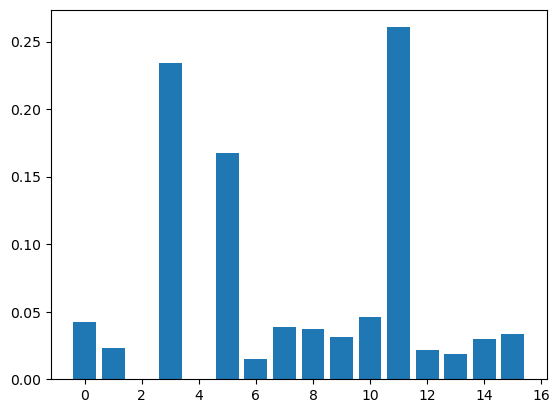

In [12]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

# define the model
model = XGBClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i],v))
# plot feature importance
pyplot.clf() 
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [47]:
importance

array([0.30525157, 0.05572326, 0.04358706, 0.00374774, 0.        ,
       0.12945756, 0.01356689, 0.        , 0.03516891, 0.03543939,
       0.04457276, 0.21452977, 0.03197635, 0.02612279, 0.02412321,
       0.0367328 ], dtype=float32)